In [1]:
import pandas as pd
import numpy as np
import psutil
import h2o
from h2o.automl import H2OAutoML
from matplotlib import pyplot as plt

In [2]:
# curriculos com interesse
com = pd.read_csv('../data/out_of_time/curriculosComInteresse/csv/df.csv')

In [3]:
com['interesse'] = 1

In [4]:
# curriculos sem interesse
sem = pd.read_csv('../data/out_of_time/curriculosSemInteresse/csv/df.csv')

In [5]:
sem['interesse'] = 0

In [6]:
df = com.append(sem, ignore_index=True)

In [7]:
# ultima mudanca de emprego
ultima_mudanca = df.loc[df.label == 1].groupby(by='id', as_index=False).agg({'experiencia_meses' : 'max'})
ultima_mudanca.columns = ['id', 'ultima_mudanca']

In [8]:
len(np.unique(df.id))

3435

In [9]:
# faltando um povo aqui...provavelmente quem nunca mudou de emprego.

In [10]:
sem_mudanca = df.groupby(by='id', as_index=False).agg({'label' : 'sum'})
sem_mudanca = sem_mudanca.loc[sem_mudanca.label == 0]
sem_mudanca['ultima_mudanca'] = 0
sem_mudanca.drop(columns=['label'], inplace=True)

In [11]:
ultima_mudanca = ultima_mudanca.append(sem_mudanca, ignore_index=True)

In [12]:
df = pd.merge(df, ultima_mudanca, left_on='id', right_on='id')

In [13]:
df = df.loc[df.experiencia_meses > df.ultima_mudanca].reset_index(drop=True)

In [14]:
df.columns

Index(['data', 'experiencia_meses', 'homem', 'id', 'idioma-en-fala',
       'idioma-en-le', 'label', 'solteiro', 'taxa_permanencia', 'tem_cnh',
       'tempo_cargo', 'tempo_emprego', 'tempo_empresa', 'tempo_municipio',
       'skill_estagio', 'interesse', 'ultima_mudanca'],
      dtype='object')

In [15]:
uteis = ['id', 'interesse', 'data', 'experiencia_meses', 'homem', 'idioma-en-fala', 'idioma-en-le', 'solteiro', 
         'taxa_permanencia', 'tem_cnh', 'tempo_cargo', 'tempo_emprego', 'tempo_empresa', 'tempo_municipio', 
         'skill_estagio']

In [16]:
df = df[uteis]

In [17]:
df

,id,interesse,data,experiencia_meses,homem,idioma-en-fala,idioma-en-le,solteiro,taxa_permanencia,tem_cnh,tempo_cargo,tempo_emprego,tempo_empresa,tempo_municipio,skill_estagio
0,cv10005.xml,1,2016-06-01,16,0.0,0.0,0.0,0,1.500000,0,1,10,1,1,0
1,cv10005.xml,1,2016-07-01,17,0.0,0.0,0.0,0,1.571429,0,2,11,2,2,0
2,cv10005.xml,1,2016-08-01,18,0.0,0.0,0.0,0,1.636364,0,3,12,3,3,0
3,cv10005.xml,1,2016-09-01,19,0.0,0.0,0.0,0,1.695652,0,4,13,4,4,0
4,cv10005.xml,1,2016-10-01,20,0.0,0.0,0.0,0,1.750000,0,5,14,5,5,0
5,cv10005.xml,1,2016-11-01,21,0.0,0.0,0.0,0,1.800000,0,6,15,6,6,0
6,cv10005.xml,1,2016-12-01,22,0.0,0.0,0.0,0,1.846154,0,7,16,7,7,0
7,cv10005.xml,1,2017-01-01,23,0.0,0.0,0.0,0,1.888889,0,8,17,8,8,0
8,cv10005.xml,1,2017-02-01,24,0.0,0.0,0.0,0,1.928571,0,9,18,9,9,0
9,cv10005.xml,1,2017-03-01,25,0.0,0.0,0.0,0,1.965517,0,10,19,10,10,0


In [18]:
cpus = psutil.cpu_count() - 2
memoria = str(round(3/float(4) * psutil.virtual_memory().total / float(1024**3))) + "G"

In [19]:
try:
    h2o.cluster().shutdown()
except AttributeError:
    pass
    
h2o.init(nthreads = cpus,
         max_mem_size = memoria)         

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp109fdfy6
  JVM stdout: /tmp/tmp109fdfy6/h2o_mourao_started_from_python.out
  JVM stderr: /tmp/tmp109fdfy6/h2o_mourao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Sao_Paulo
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.4
H2O cluster version age:,3 months and 19 days !!!
H2O cluster name:,H2O_from_python_mourao_y9w0cp
H2O cluster total nodes:,1
H2O cluster free memory:,21.33 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,6
H2O cluster status:,"accepting new members, healthy"


In [20]:
hf = h2o.H2OFrame(df)

/opt/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [21]:
modelo = h2o.load_model('../mdl/GBM_grid_0_AutoML_20180827_223625_model_2.h2o')

In [22]:
pred_h2o = modelo.predict(hf)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [23]:
pred = h2o.as_list(pred_h2o)

In [24]:
h2o.cluster().shutdown()

H2O session _sid_8310 closed.


In [25]:
pred

,predict,p0,p1
0,0,0.935682,0.064318
1,0,0.961091,0.038909
2,0,0.949972,0.050028
3,0,0.925722,0.074278
4,0,0.975635,0.024365
5,0,0.972369,0.027631
6,0,0.958168,0.041832
7,0,0.956080,0.043920
8,0,0.957941,0.042059
9,0,0.963493,0.036507


In [26]:
df = pd.concat([df, pred[['predict', 'p1']]], axis=1)

In [27]:
df

,id,interesse,data,experiencia_meses,homem,idioma-en-fala,idioma-en-le,solteiro,taxa_permanencia,tem_cnh,tempo_cargo,tempo_emprego,tempo_empresa,tempo_municipio,skill_estagio,predict,p1
0,cv10005.xml,1,2016-06-01,16,0.0,0.0,0.0,0,1.500000,0,1,10,1,1,0,0,0.064318
1,cv10005.xml,1,2016-07-01,17,0.0,0.0,0.0,0,1.571429,0,2,11,2,2,0,0,0.038909
2,cv10005.xml,1,2016-08-01,18,0.0,0.0,0.0,0,1.636364,0,3,12,3,3,0,0,0.050028
3,cv10005.xml,1,2016-09-01,19,0.0,0.0,0.0,0,1.695652,0,4,13,4,4,0,0,0.074278
4,cv10005.xml,1,2016-10-01,20,0.0,0.0,0.0,0,1.750000,0,5,14,5,5,0,0,0.024365
5,cv10005.xml,1,2016-11-01,21,0.0,0.0,0.0,0,1.800000,0,6,15,6,6,0,0,0.027631
6,cv10005.xml,1,2016-12-01,22,0.0,0.0,0.0,0,1.846154,0,7,16,7,7,0,0,0.041832
7,cv10005.xml,1,2017-01-01,23,0.0,0.0,0.0,0,1.888889,0,8,17,8,8,0,0,0.043920
8,cv10005.xml,1,2017-02-01,24,0.0,0.0,0.0,0,1.928571,0,9,18,9,9,0,0,0.042059
9,cv10005.xml,1,2017-03-01,25,0.0,0.0,0.0,0,1.965517,0,10,19,10,10,0,0,0.036507


In [28]:
df.to_csv('../data/out_of_time/df.csv', index=False)

In [29]:
# total ids
total = len(np.unique(df.id))
total

3435

In [30]:
# ids positivos
len(np.unique(df.loc[df.interesse == 1].id))

2743

In [31]:
# verdadeiros positivos
vp_ids = list(set(df.loc[(df.interesse == 1) & (df.predict == 1)].id.tolist()))
len(vp_ids)

674

In [32]:
# falsos positivos
fp_ids = list(set(df.loc[(df.interesse == 0) & (df.predict == 1)].id.tolist()))
len(fp_ids)

215

In [33]:
# falsos negativos
fn_ids = list(set(df.loc[(df.interesse == 1) & (df.predict == 0) & (~df.id.isin(vp_ids + fp_ids))].id.tolist()))
len(np.unique(fn_ids))

2069

In [34]:
# verdadeiros negativos
vn_ids = total - (len(vp_ids) + len(fp_ids) + len(fn_ids))
vn_ids

477

In [35]:
# out of time: 1 em cada 4
215 / np.float(674+215)

0.24184476940382452

In [36]:
# teste: 1 em cada 3
279 / np.float(279+482)

0.36662286465177396

In [44]:
df.data = pd.to_datetime(df.data)

In [50]:
interessados = df.loc[df.interesse == 1]

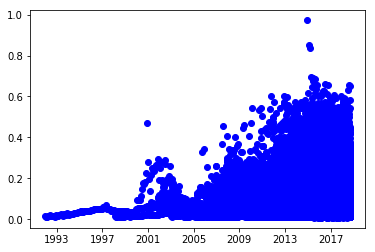

In [51]:
plt.plot(interessados.data, interessados.p1, 'bo')
plt.show()

In [52]:
nao_interessados = df.loc[df.interesse == 0]

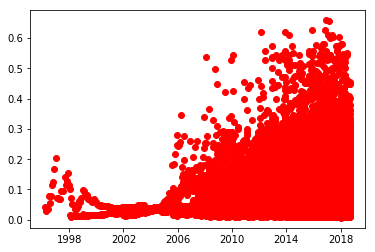

In [55]:
plt.plot(nao_interessados.data, nao_interessados.p1, 'ro')
plt.show()